In [88]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set_theme()

In [89]:
zipcode = '97062'
filename = 'data/' + zipcode + '_homes_data_cleaned.csv'
df = pd.read_csv(filename)

In [90]:
df.describe(include='all')

,Address,link,price,beds,baths,sqft,view_yn,yr_built,cooling_yn,senior_community_yn,style,county,new_construction_yn,has_hoa
count,107,107,107.00,107.00,107.00,107.00,107,107.00,107,107,107,107,107,107
unique,107,107,NaN,NaN,NaN,NaN,2,NaN,2,1,2,2,2,2
top,4535 SW Saum Way,https://www.redfin.com/OR/Tualatin/4535-SW-Sau...,NaN,NaN,NaN,NaN,No,NaN,Yes,No,Single Family Residential,Washington County,No,No
freq,1,1,NaN,NaN,NaN,NaN,79,NaN,75,107,84,95,106,70
mean,NaN,NaN,633171.68,3.23,2.40,2019.69,NaN,1988.98,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,351481.00,0.85,0.64,1015.64,NaN,12.49,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,201100.00,2.00,1.00,852.00,NaN,1945.00,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,487000.00,3.00,2.00,1319.00,NaN,1980.00,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,580000.00,3.00,2.50,1737.00,NaN,1988.00,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,699900.00,4.00,2.50,2380.00,NaN,1996.00,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
df['log_price'] = np.log(df['price'])

In [92]:
df.isnull().sum()

Address                0
link                   0
price                  0
beds                   0
baths                  0
sqft                   0
view_yn                0
yr_built               0
cooling_yn             0
senior_community_yn    0
style                  0
county                 0
new_construction_yn    0
has_hoa                0
log_price              0
dtype: int64

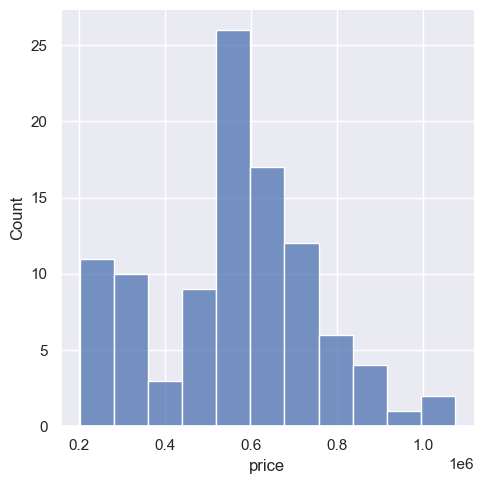

In [95]:
ax=sns.displot(df['price'])

In [94]:
q = df['price'].quantile(0.95)
df = df[df['price']<q]

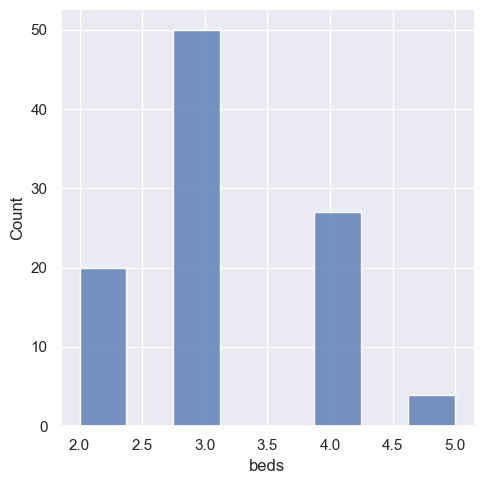

In [96]:
ax=sns.displot(df['beds'])

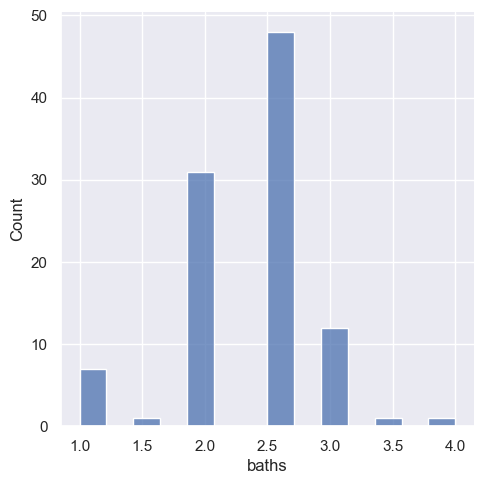

In [59]:
ax=sns.displot(df['baths'])

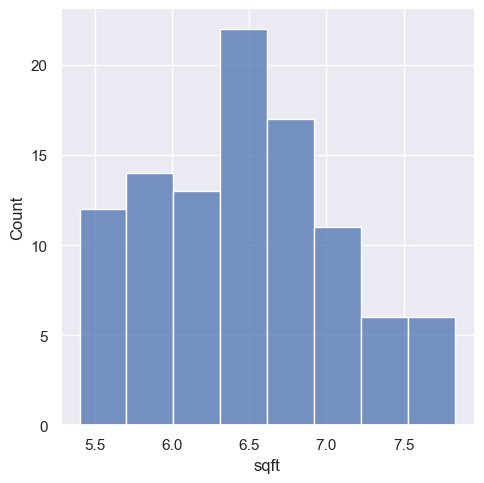

In [100]:
ax=sns.displot(np.sqrt(df['sqft']))

In [98]:
df['sqft'] = np.sqrt(df['sqft'])

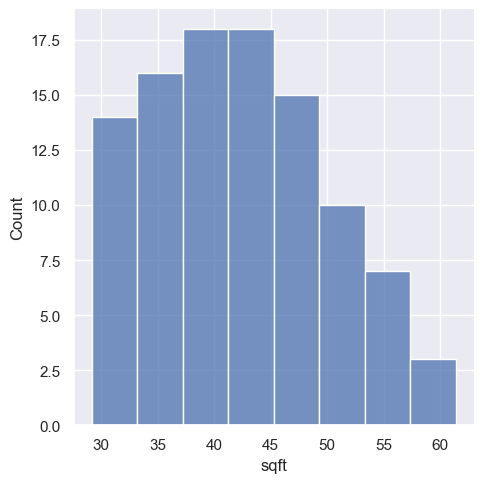

In [99]:
ax=sns.displot(df['sqft'])

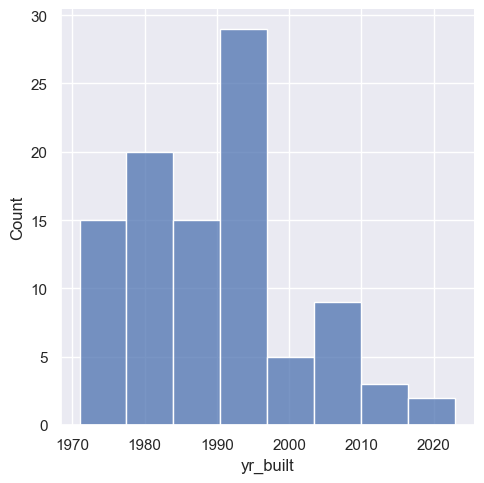

In [103]:
ax=sns.displot(df['yr_built'])

In [102]:
q = df['yr_built'].quantile(0.01)
df = df[df['yr_built']>q]

In [104]:
df = df.reset_index(drop=True)
df.describe(include='all')

,Address,link,price,beds,baths,sqft,view_yn,yr_built,cooling_yn,senior_community_yn,style,county,new_construction_yn,has_hoa,log_price
count,98,98,98.00,98.00,98.00,98.00,98,98.00,98,98,98,98,98,98,98.00
unique,98,98,NaN,NaN,NaN,NaN,2,NaN,2,1,2,2,2,2,NaN
top,4535 SW Saum Way,https://www.redfin.com/OR/Tualatin/4535-SW-Sau...,NaN,NaN,NaN,NaN,No,NaN,Yes,No,Single Family Residential,Washington County,No,No,NaN
freq,1,1,NaN,NaN,NaN,NaN,78,NaN,67,98,75,93,97,63,NaN
mean,NaN,NaN,562830.31,3.15,2.34,42.32,NaN,1989.85,NaN,NaN,NaN,NaN,NaN,NaN,13.17
std,NaN,NaN,190133.87,0.78,0.51,7.89,NaN,11.78,NaN,NaN,NaN,NaN,NaN,NaN,0.39
min,NaN,NaN,201100.00,2.00,1.00,29.19,NaN,1971.00,NaN,NaN,NaN,NaN,NaN,NaN,12.21
25%,NaN,NaN,481250.00,3.00,2.00,35.70,NaN,1980.00,NaN,NaN,NaN,NaN,NaN,NaN,13.08
50%,NaN,NaN,573000.00,3.00,2.50,41.45,NaN,1989.00,NaN,NaN,NaN,NaN,NaN,NaN,13.26
75%,NaN,NaN,673750.00,4.00,2.50,47.47,NaN,1996.00,NaN,NaN,NaN,NaN,NaN,NaN,13.42


## Checking OLS Assumptions

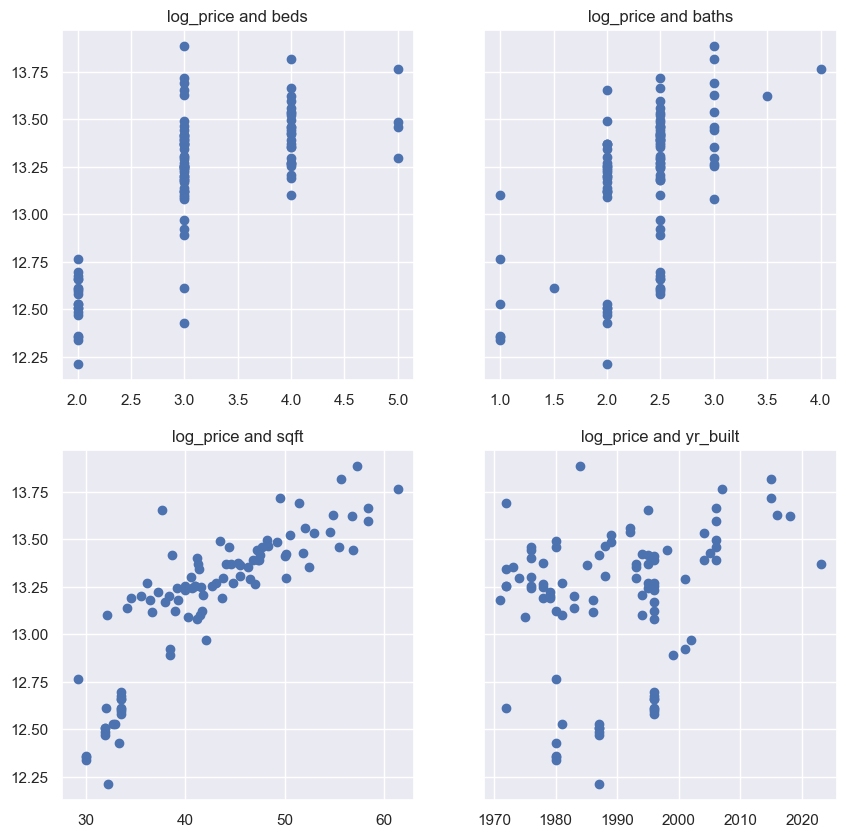

In [105]:
f, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, sharey=True, figsize=(10, 10))
ax1.scatter(df['beds'], df['log_price'])
ax1.set_title('log_price and beds')
ax2.scatter(df['baths'], df['log_price'])
ax2.set_title('log_price and baths')
ax3.scatter(df['sqft'], df['log_price'])
ax3.set_title('log_price and sqft')
ax4.scatter(df['yr_built'], df['log_price'])
ax4.set_title('log_price and yr_built')

plt.show()

## Create Dummy variables

In [106]:
# Reorder columns
columns = ['Address', 'link', 'price', 'log_price', 'beds', 'baths', 'sqft', 'yr_built', 'view_yn', 'cooling_yn', 'senior_community_yn', 'style', 'county', 'new_construction_yn', 'has_hoa']
df = df[columns]
cleaned_df = df[columns]

In [107]:
df = pd.get_dummies(df, columns=df.columns[8:], drop_first=True)

In [108]:
df.head()

,Address,link,price,log_price,beds,baths,sqft,yr_built,view_yn_Yes,cooling_yn_Yes,style_Single Family Residential,county_Washington County,new_construction_yn_Yes,has_hoa_Yes
0,4535 SW Saum Way,https://www.redfin.com/OR/Tualatin/4535-SW-Sau...,760000,13.54,4,3.00,54.56,1992,0,0,1,0,0,0
1,8824 SW Talawa Dr,https://www.redfin.com/OR/Tualatin/8824-SW-Tal...,645000,13.38,3,2.50,45.30,1978,0,1,1,1,0,0
2,5105 SW Greenwood Cir,https://www.redfin.com/OR/Tualatin/5105-SW-Gre...,745000,13.52,4,2.50,50.58,1989,0,1,1,0,0,0
3,22305 SW Taylors Dr,https://www.redfin.com/OR/Tualatin/22305-SW-Ta...,666888,13.41,3,2.50,50.04,1996,0,1,1,1,0,0
4,7007 SW Robbins Rd,https://www.redfin.com/OR/Tualatin/7007-SW-Rob...,850000,13.65,3,2.00,37.66,1995,1,1,1,1,0,0


## Checking for multicollinearity

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df[[ 'sqft', 'beds', 'yr_built', 'cooling_yn_Yes', 'style_Single Family Residential', 'county_Washington County', 'has_hoa_Yes']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [72]:
vif

,VIF,features
0,90.87,sqft
1,51.13,beds
2,91.15,yr_built
3,6.17,cooling_yn_Yes
4,20.32,style_Single Family Residential
5,23.97,county_Washington County
6,3.84,has_hoa_Yes


## Linear Regression Model

In [114]:
targets = df['price']
inputs = df.drop(['Address', 'link', 'price', 'log_price', 'baths', 'log_price', 'new_construction_yn_Yes', 'view_yn_Yes'], axis=1)

### Scale the data

In [115]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [116]:
inputs_scaled = scaler.transform(inputs)

In [117]:
inputs_scaled

array([[ 1.09428616,  1.56039009,  0.18364295, -1.47013276,  0.55377492,
        -4.31277173, -0.74535599],
       [-0.19776256,  0.37965039, -1.01047142,  0.68021068,  0.55377492,
         0.23186945, -0.74535599],
       [ 1.09428616,  1.05239458, -0.0722387 ,  0.68021068,  0.55377492,
        -4.31277173, -0.74535599],
       [-0.19776256,  0.98398266,  0.52481849,  0.68021068,  0.55377492,
         0.23186945, -0.74535599],
       [-0.19776256, -0.59456003,  0.43952461,  0.68021068,  0.55377492,
         0.23186945, -0.74535599],
       [ 1.09428616,  1.23750185,  0.18364295,  0.68021068,  0.55377492,
         0.23186945, -0.74535599],
       [-1.48981127, -1.11154581,  0.52481849, -1.47013276, -1.8057878 ,
         0.23186945,  1.34164079],
       [-1.48981127, -1.31955903, -0.24282646, -1.47013276, -1.8057878 ,
         0.23186945,  1.34164079],
       [-0.19776256, -1.14391442, -0.83988365, -1.47013276, -1.8057878 ,
         0.23186945,  1.34164079],
       [ 1.09428616, -0.0652

### Train Test Split

In [118]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=0)

### Ridge Regression

In [119]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=5.0)
ridge.fit(x_train, y_train)

Ridge(alpha=5.0)

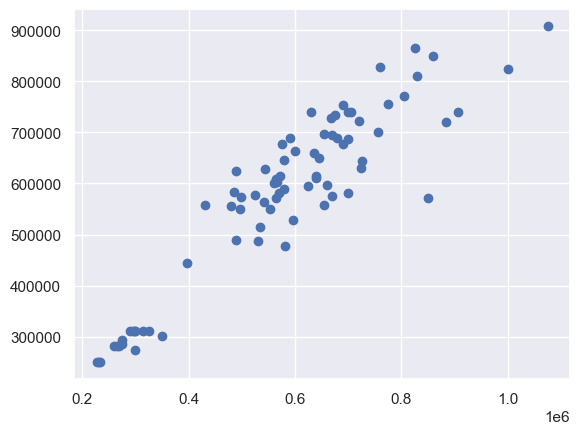

In [120]:
y_hat = ridge.predict(x_train)
plt.scatter(y_train, y_hat)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

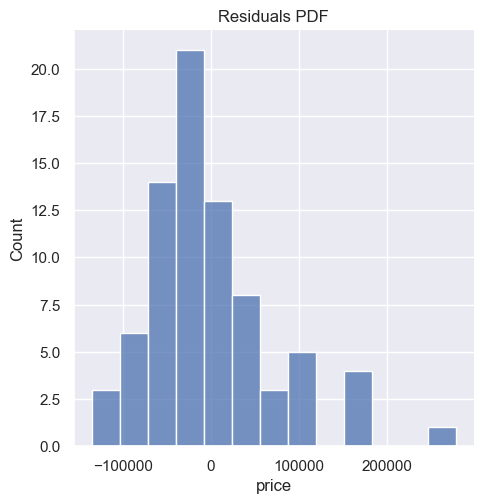

In [121]:
sns.displot(y_train - y_hat)
plt.title("Residuals PDF")

In [122]:
ridge.score(x_train, y_train)

0.8523515516493997

In [123]:
ridge.score(x_test, y_test)

0.9008612663733153

In [124]:
def adj_r2(x,y):
    r2 = ridge.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [125]:
adj_r2(x_train, y_train)

0.8375867068143397

In [126]:
adj_r2(x_test, y_test)

0.8430303384244159

In [127]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = ((ridge.coef_ / scaler.scale_) - 1) * 100

In [128]:
from sklearn.feature_selection import f_regression
f_stat, p_values = f_regression(x_train, y_train)

In [129]:
reg_summary['f_stat'] = f_stat.round(3)
reg_summary['p_value'] = p_values.round(3)
reg_summary

,Features,Weights,f_stat,p_value
0,beds,573409.82,67.16,0.00
1,sqft,1253610.07,228.07,0.00
2,yr_built,102761.59,7.25,0.01
3,cooling_yn_Yes,6127852.99,41.31,0.00
4,style_Single Family Residential,6619649.08,107.04,0.00
5,county_Washington County,-10218278.59,9.01,0.00
6,has_hoa_Yes,-7705076.91,31.35,0.00


In [130]:
y_hat_test = ridge.predict(x_test)

## Test Dataset Error Plot

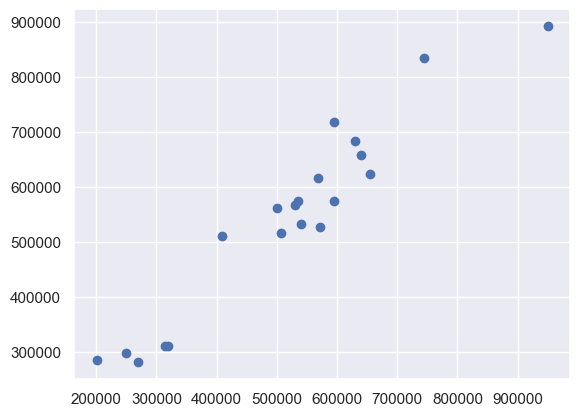

In [131]:
plt.scatter(y_test, y_hat_test)
plt.show()

In [132]:
df_pf = pd.DataFrame(y_hat_test, columns=['predictions'])

In [134]:
y_test = y_test.reset_index(drop=True)
df_pf['target'] = y_test
df_pf

,predictions,target
0,528240.01,571000
1,617130.81,569000
2,835445.51,745000
3,515923.59,507000
4,567558.57,530000
5,311636.23,320000
6,533000.82,540000
7,574876.02,595000
8,624391.92,655000
9,717592.21,595000


In [136]:
df_pf['residual'] = df_pf['target'] - df_pf['predictions']
df_pf['Difference%'] = (df_pf['residual']/df_pf['target']*100).round(2)
df_pf

,predictions,target,residual,Difference%
0,528240.01,571000,42759.99,7.49
1,617130.81,569000,-48130.81,-8.46
2,835445.51,745000,-90445.51,-12.14
3,515923.59,507000,-8923.59,-1.76
4,567558.57,530000,-37558.57,-7.09
5,311636.23,320000,8363.77,2.61
6,533000.82,540000,6999.18,1.30
7,574876.02,595000,20123.98,3.38
8,624391.92,655000,30608.08,4.67
9,717592.21,595000,-122592.21,-20.60


In [137]:
import scipy.stats as stats
SE_residual = np.sqrt(np.sum(df_pf['residual']**2) / (len(y_test) - x_test.shape[1]))
margin_error = SE_residual*stats.t.ppf(.9, len(x_test) - 1)
df_pf['lower_bound'] = df_pf['predictions'] - margin_error
df_pf['upper_bound'] = df_pf['predictions'] + margin_error
df_pf

,predictions,target,residual,Difference%,lower_bound,upper_bound
0,528240.01,571000,42759.99,7.49,436319.57,620160.45
1,617130.81,569000,-48130.81,-8.46,525210.37,709051.25
2,835445.51,745000,-90445.51,-12.14,743525.07,927365.94
3,515923.59,507000,-8923.59,-1.76,424003.15,607844.02
4,567558.57,530000,-37558.57,-7.09,475638.13,659479.01
5,311636.23,320000,8363.77,2.61,219715.80,403556.67
6,533000.82,540000,6999.18,1.30,441080.38,624921.26
7,574876.02,595000,20123.98,3.38,482955.58,666796.46
8,624391.92,655000,30608.08,4.67,532471.48,716312.35
9,717592.21,595000,-122592.21,-20.60,625671.78,809512.65


# Writing predictions to csv

In [138]:
predicted_price = ridge.predict(inputs_scaled)
cleaned_df['predicted_price'] = predicted_price
pd.set_option('display.float_format', lambda x: '%.2f' % x)
cleaned_df['difference'] = cleaned_df['predicted_price'] - cleaned_df['price']
cleaned_df['difference%'] = 100*cleaned_df['difference']/cleaned_df['price']
column_order = ['Address', 'link', 'price', 'predicted_price', 'difference', 'difference%', 'beds', 'baths', 'sqft',
       'yr_built', 'view_yn', 'cooling_yn', 'senior_community_yn', 'style',
       'county', 'new_construction_yn', 'has_hoa']
cleaned_df = cleaned_df[column_order]
cleaned_df

,Address,link,price,predicted_price,difference,difference%,beds,baths,sqft,yr_built,view_yn,cooling_yn,senior_community_yn,style,county,new_construction_yn,has_hoa
0,4535 SW Saum Way,https://www.redfin.com/OR/Tualatin/4535-SW-Sau...,760000,827214.89,67214.89,8.84,4,3.00,54.56,1992,No,No,No,Single Family Residential,Clackamas County,No,No
1,8824 SW Talawa Dr,https://www.redfin.com/OR/Tualatin/8824-SW-Tal...,645000,650047.19,5047.19,0.78,3,2.50,45.30,1978,No,Yes,No,Single Family Residential,Washington County,No,No
2,5105 SW Greenwood Cir,https://www.redfin.com/OR/Tualatin/5105-SW-Gre...,745000,835445.51,90445.51,12.14,4,2.50,50.58,1989,No,Yes,No,Single Family Residential,Clackamas County,No,No
3,22305 SW Taylors Dr,https://www.redfin.com/OR/Tualatin/22305-SW-Ta...,666888,728000.39,61112.39,9.16,3,2.50,50.04,1996,No,Yes,No,Single Family Residential,Washington County,No,No
4,7007 SW Robbins Rd,https://www.redfin.com/OR/Tualatin/7007-SW-Rob...,850000,571716.79,-278283.21,-32.74,3,2.00,37.66,1995,Yes,Yes,No,Single Family Residential,Washington County,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,20918 SW Winema Ct,https://www.redfin.com/OR/Tualatin/20918-SW-Wi...,566000,603286.48,37286.48,6.59,3,2.50,41.57,1978,Yes,Yes,No,Single Family Residential,Washington County,No,No
94,8294 SW Mohawk St,https://www.redfin.com/OR/Tualatin/8294-SW-Moh...,227500,250872.23,23372.23,10.27,2,1.00,30.07,1980,No,No,No,Condo/Co-op,Washington County,No,Yes
95,9435 SW Siletz Dr,https://www.redfin.com/OR/Tualatin/9435-SW-Sil...,575000,677241.18,102241.18,17.78,4,3.00,47.01,1978,No,Yes,No,Single Family Residential,Washington County,No,No
96,21172 SW Iroquois Dr,https://www.redfin.com/OR/Tualatin/21172-SW-Ir...,552500,549901.59,-2598.41,-0.47,3,2.00,37.23,1979,No,Yes,No,Single Family Residential,Washington County,No,No


In [ ]:
cleaned_df.to_csv('predictions/97062nonlog_ridge_predictions.csv')

In [146]:
d = {'beds': [3], 'baths': [2.5], 'sqft': [np.sqrt(2064)], 'cooling_yn_Yes': [1], 'style_Single Family Residential': [1], 'county_Washington County': [1], 'has_hoa_Yes': [1]}
gl_home = pd.DataFrame(data=d)
gl_home

,beds,baths,sqft,cooling_yn_Yes,style_Single Family Residential,county_Washington County,has_hoa_Yes
0,3,2.50,45.43,1,1,1,1


In [147]:
price = ridge.predict(gl_home)
price

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


array([1372781.4022882])